**ИССЛЕДОВАТЕЛЬСКИЙ [АНАЛИЗ ДАННЫХ О СТРАХОВАНИИ](https://colab.research.google.com/drive/1HDEpZ284YDglEAwhgsY1lYnAfuq3zRF9#scrollTo=Z-Lt_zSVStin&line=1&uniqifier=1)**



**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
# tells python to actually display the graphs
from sklearn.preprocessing import LabelEncoder # import lable encoder
import copy
import scipy.stats as stats

In [2]:
!pip install scikit-learn

Этот набор данных содержит 1338 строк застрахованных данных, где страховые сборы указаны по следующим признакам застрахованного: возраст, пол, ИМТ(индекс массы тела), количество детей, курильщик и регион. В наборе данных отсутствуют отсутствующие или неопределенные значения.

**Чтение фрейма данных**

In [3]:
df_ins = pd.read_csv("https://raw.githubusercontent.com/trisha00001/file/main/insurance.csv")

In [4]:
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1338 наблюдений. Данные заполнены полностью. 7 столбцов. 3 категориальные переменные.

In [8]:
print("Top 4 rows of the data")
print(df_ins.head(4))
print("")
print("Bottom 4 rows of the data")
print(df_ins.tail(4))

Top 4 rows of the data
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061

Bottom 4 rows of the data
      age     sex    bmi  children smoker     region     charges
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


**Базовый исследовательский анализ структуры данных страхования**

In [9]:
#Shape of the date

rows, coulmn = df_ins.shape
print(f'Datataframe состоит из {rows} строк и {coulmn} столбцов')

Datataframe состоит из 1338 строк и 7 столбцов


Dataframe имеет 7 атрибутов. Из этих 7 атрибутов 4 являются числовыми (возраст, bmi, childeren, обвинения) и 3 категоричны (пол, курильщик, регион)

Хотя дети кажутся целым числом, но оно несет информацию о наличии 0, 1, 2, 3, 4 или 5 детей. Его можно рассматривать как категоричное, а необходимое лечение может применяться по мере необходимости.

**Наличие отсутствующих значений**

In [10]:
df_ins.isnull().values.any()

np.False_

In [11]:
df_ins.isnull().sum().sum()

np.int64(0)

In [12]:
df_ins.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Фрейм данных не имеет отсутствующих значений

**Описательные статистики**

In [13]:
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Возраст людей составляет от 18 (мин) до 64 (макс.). Среднее и медианное значение составляют 39,20 и 39 соответственно, что показывает, что точки данных почти равномерно распределены вокруг среднего и медианного значения.

Диапазон ИМТ составляет от 15,96 (мин) до 53,13 (макс.). Среднее и медианное значение составляют 30,66 и 30,40 соответственно. Точки данных, по-видимому, равномерно распределены

75% людей в Dataframe имеют 2 или менее детей. 25% людей имеют более 2 детей.

Минимальное и максимальное значение трат по страховке составляет 1121,8 и 63770,4 соответственно, а медиана составляет 9382. Данные, по-видимому, сильно искажены


**Распределение ИМТ, возраста и сборов**

**Индекс массы тела**

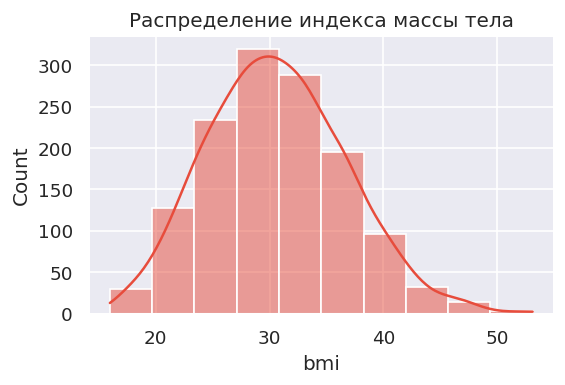

In [14]:
plt.subplots(figsize=(5,3),dpi=120)
sns.histplot(df_ins['bmi'], kde= True, bins = 10, color="#e74c3c")
plt.title("Распределение индекса массы тела");

Кажется, имеет колоколообразную кривую, но его правый хвост немного растянулся, что указывает на существование экстремальных значений.

**Возраст**

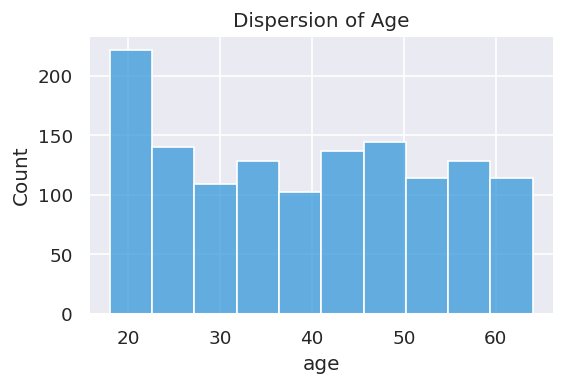

In [15]:
plt.subplots(figsize=(5,3),dpi=120)
sns.histplot(df_ins['age'], kde=False, bins = 10, color='#3498db');
plt.title("Dispersion of Age");

Возраст почти равномерно распределен

Число людей в возрасте около 20 лет, по-видимому, максимально в данных

In [16]:
df_ins.age.value_counts().head()

,count
age,
18,69
19,68
46,29
52,29
50,29


*Большая часть людей в наборе в возрасте от 18 и 19 лет*

**Charges**

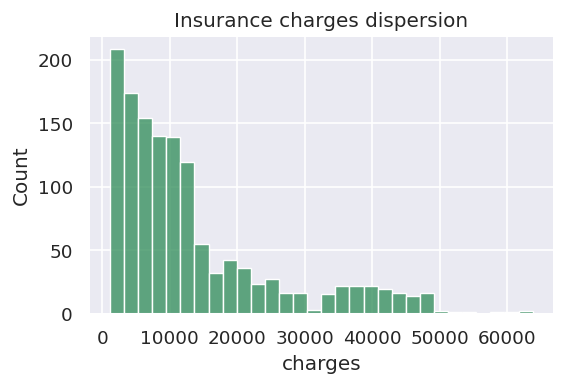

In [17]:
plt.subplots(figsize=(5,3), dpi=120)
sns.histplot(df_ins['charges'], kde=False, color='seagreen')
plt.title('Insurance charges dispersion');

*Сумма страховки положительно искажена*

**Распределение по количеству детей**

**Children**

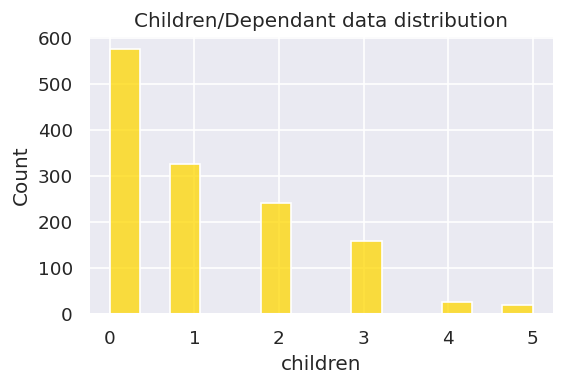

In [18]:
plt.subplots(figsize=(5,3), dpi=120)
sns.histplot(df_ins['children'], kde=False, color='gold');
plt.title("Children/Dependant data distribution");

*Максимальное количество людей не имеет детей. 4 и 5  детей есть у минимального количества народа*

**Пол**

/tmp/ipython-input-19-3244992309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_ins['sex'], palette="Blues_d")


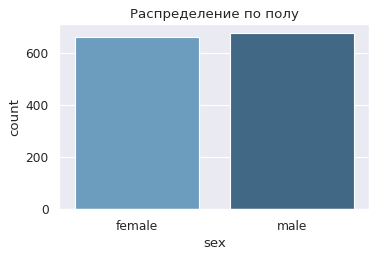

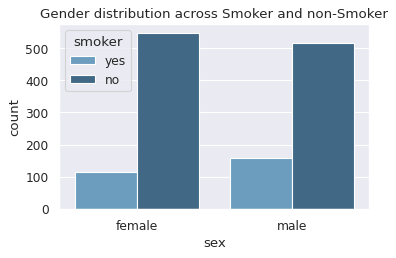

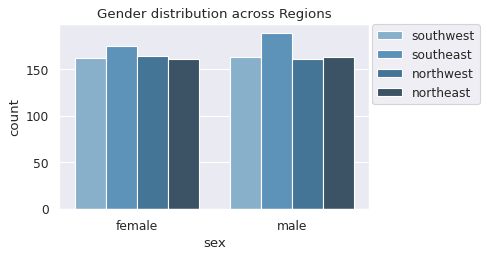

In [19]:
plt.subplots(figsize=(5,3), dpi=80)
sns.countplot(x=df_ins['sex'], palette="Blues_d")
plt.title("Распределение по полу")

plt.subplots(figsize=(5,3),dpi=80)
sns.countplot(x=df_ins['sex'], hue=df_ins['smoker'], palette="Blues_d")
plt.title("Gender distribution across Smoker and non-Smoker");

plt.subplots(figsize=(5,3), dpi=80)
sns.countplot( x=df_ins['sex'], hue=df_ins['region'], palette="Blues_d")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Gender distribution across Regions")

plt.show;

*Количество мужчин и женщин почти одинаковое. *

*Большая часть людей не курит. Курящих мужчин больше, чем женщин*

*Населения юго - восточном регионе чуть больше чем в остальных районах.*

**Сопряженная таблица по данным курящих и не курящих людей в зависимости от региона и пола**

In [20]:
ins_crosstab = pd.crosstab([df_ins.region],[df_ins.sex, df_ins.smoker],
           rownames = ['Region'],
           colnames = ['Sex', 'Smoker'])
ins_crosstab

Sex       female     male    
Smoker        no yes   no yes
Region                       
northeast    132  29  125  38
northwest    135  29  132  29
southeast    139  36  134  55
southwest    141  21  126  37

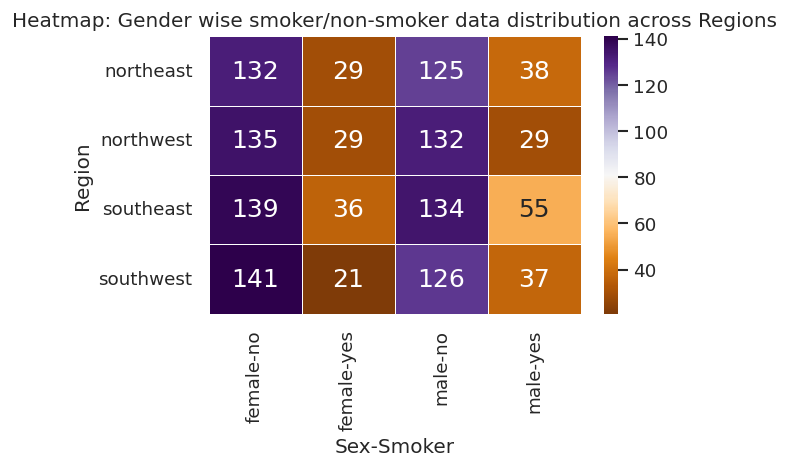

In [21]:


plt.subplots(figsize=(5,3),dpi=120)
sns.heatmap(ins_crosstab, cmap = "PuOr", annot=True,fmt = 'd',annot_kws={"size": 15},cbar=True, linewidths = .3)
plt.title("Heatmap: Gender wise smoker/non-smoker data distribution across Regions");

* Населения юго - восточном регионе чуть больше, а в северо-востоке чуть меньше.*

**Region**

/tmp/ipython-input-22-435664193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_ins['region'], palette="Blues_d")


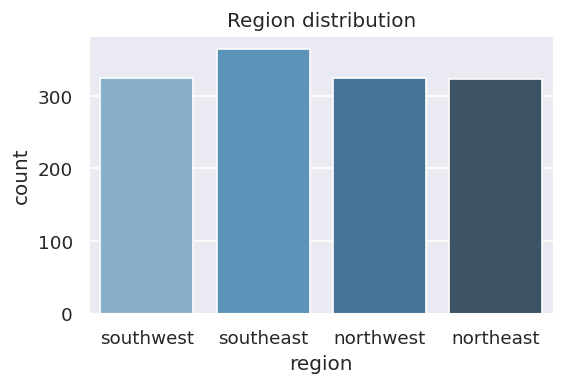

In [22]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(x=df_ins['region'], palette="Blues_d")
plt.title("Region distribution");

*Населения юго - восточном регионе чуть больше, а в северо-востоке чуть меньше.*

**Pairplot**

*Категориальные переменные игнорируюся*

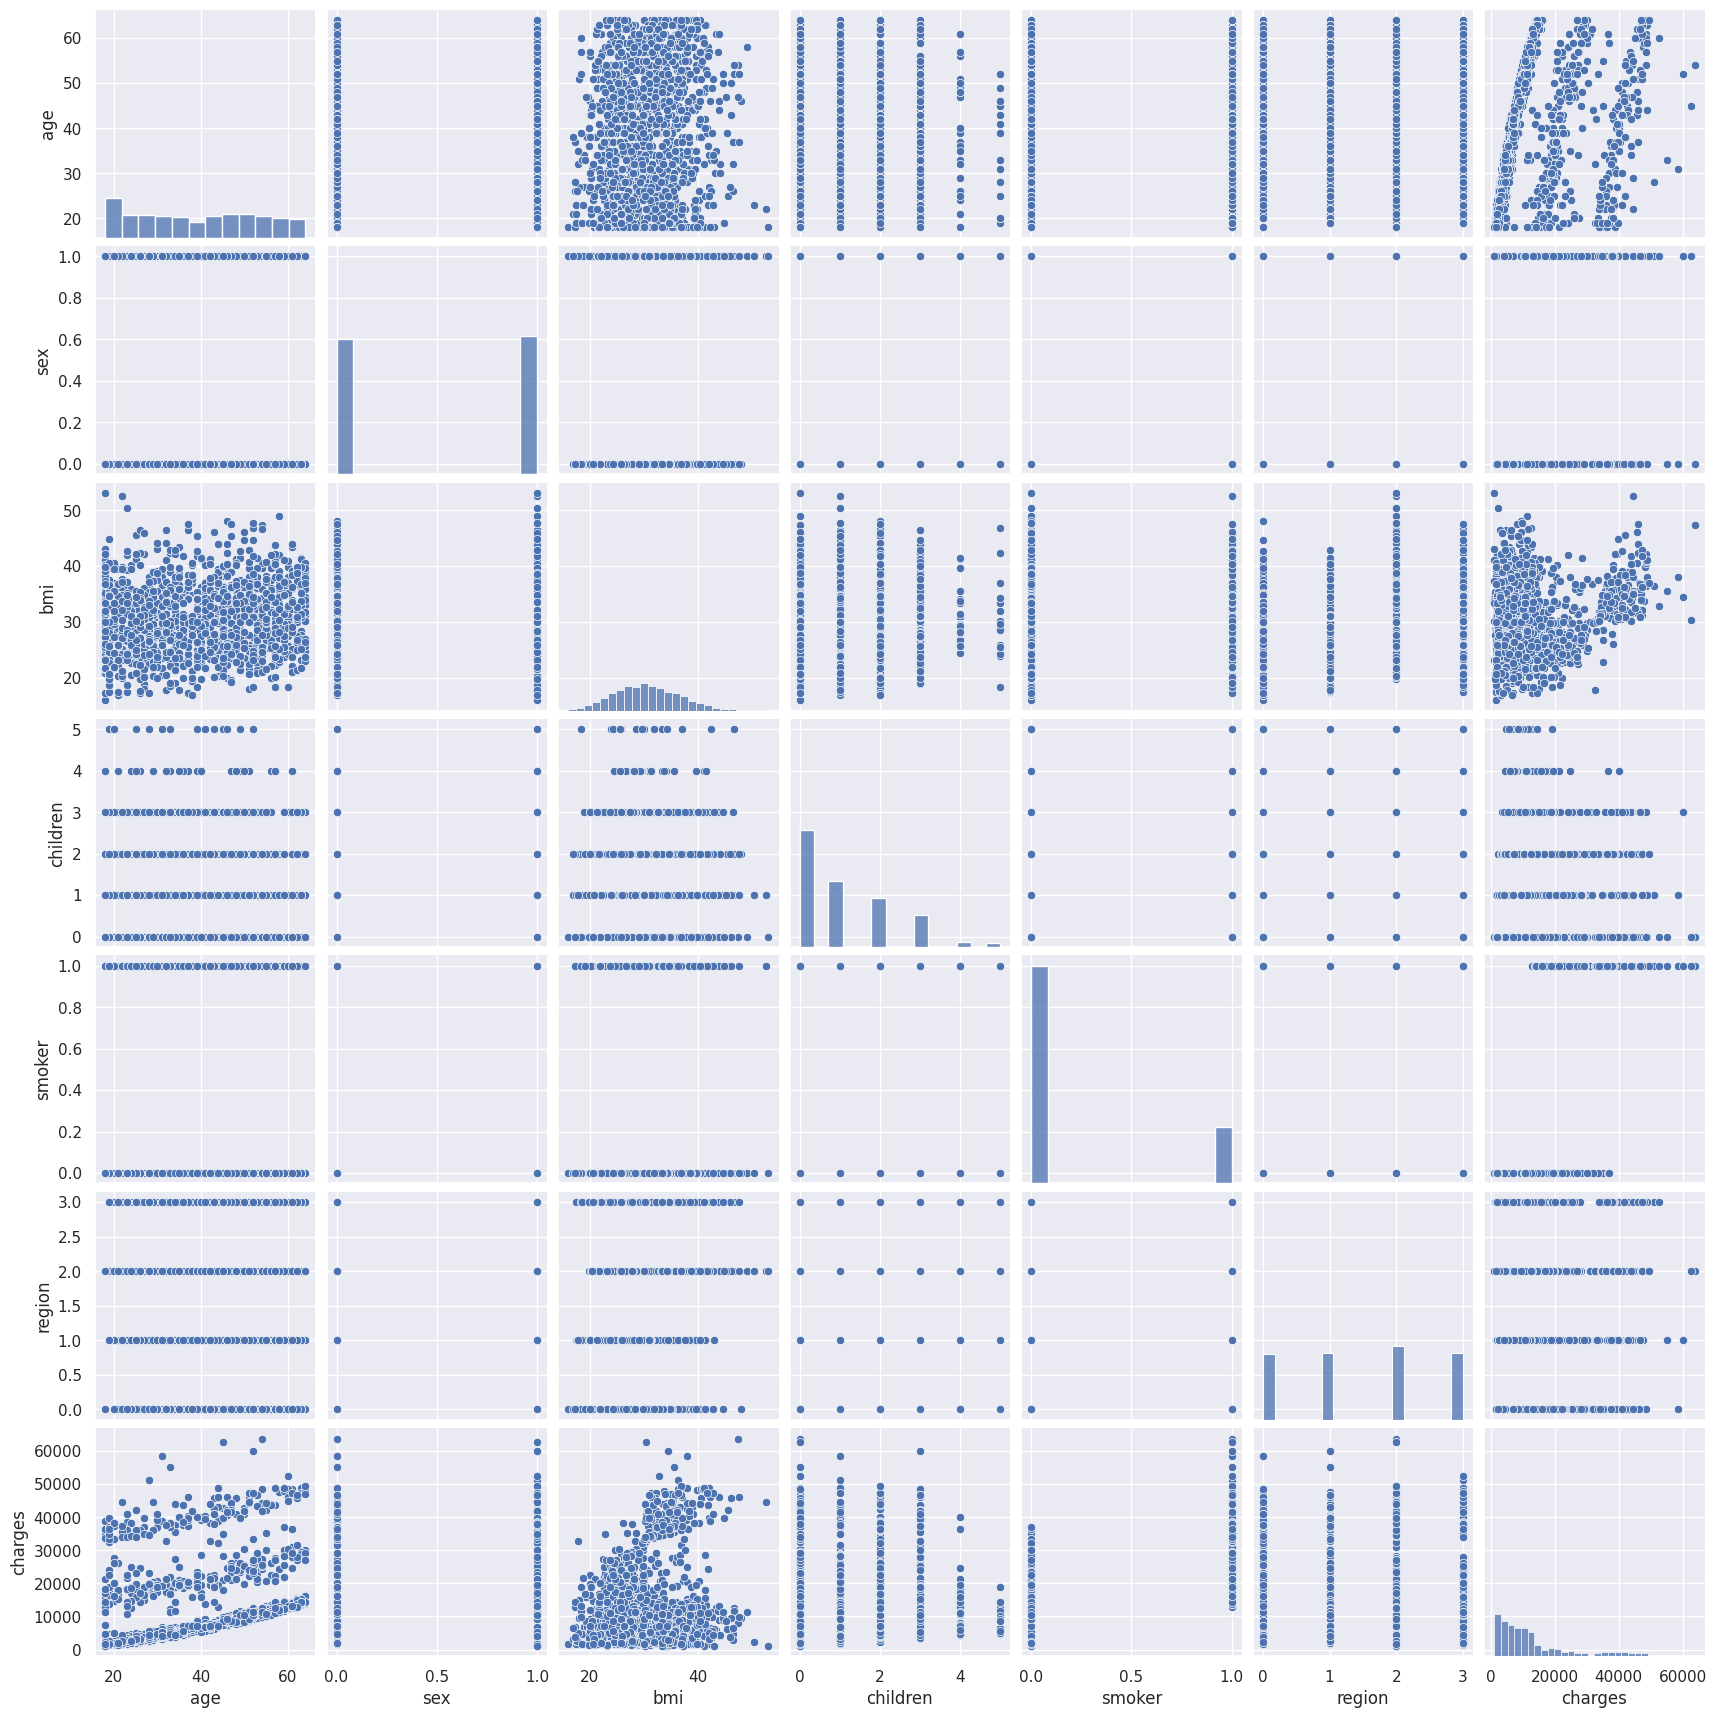

In [23]:
df_ins_encoded = copy.deepcopy(df_ins)
df_ins_encoded.loc[:,['sex', 'smoker', 'region']] = df_ins_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_ins_encoded);

In [24]:
df_ins_encoded.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


*Курящие тратят больше на здоровье, чем не курящие*
*Нужно обратить внимание на траты в зависимости от возраста*



**Мера кривизны в зависимости от bmi, возраст и расходы по страховке**

In [25]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_ins.bmi),stats.skew(df_ins.age),stats.skew(df_ins.charges)]},
                        index=['bmi','age','charges'])
Skewness.T

,bmi,age,charges
Skewness,0.283729,0.05561,1.51418


Возраст почти не имеет асимметрии

ИМТ имеет очень меньшую асимметрию, поскольку данные распределены почти равномерно

Траты по страховке сильно перекошены. Это положительная асимметрия (правая асимметрия)

**Наличие выбросов в ИМТ, возрасте и расходах**

**BMI**

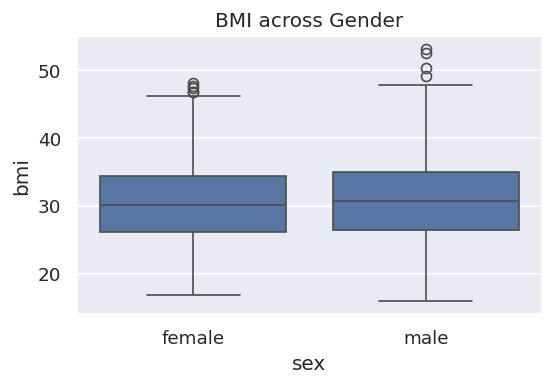

In [26]:
plt.subplots(figsize=(5,3), dpi=120)
sns.boxplot(x = df_ins['sex'],y=df_ins['bmi'])
plt.title('BMI across Gender');

ИМТ имеет некоторые экстремальные значения

Выбросы в ИМТ присутствуют как у мужчин, так и у женщин, тогда как у мужчин, по-видимому, есть выбросы в ИМТ далеко от верхних усов.

**Возраст**

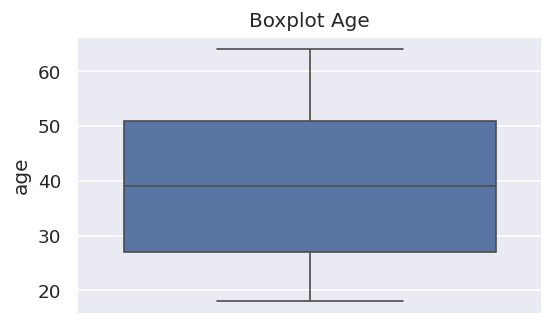

In [27]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(df_ins['age'])
plt.title('Boxplot Age');

*Возраст не имеет никакого экстремального значения*

**Charges**

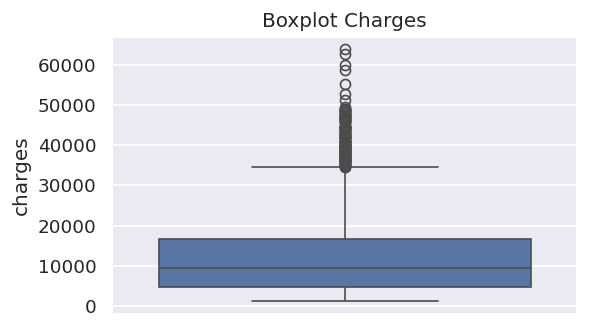

In [28]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(df_ins['charges'])
plt.title('Boxplot Charges');

*Есть выбросы в тратах по страховке на медицинские услуги*

**Статистическое исследование**

**1. Как траты по медицинскому страхованию зависят от возраста и курения?**

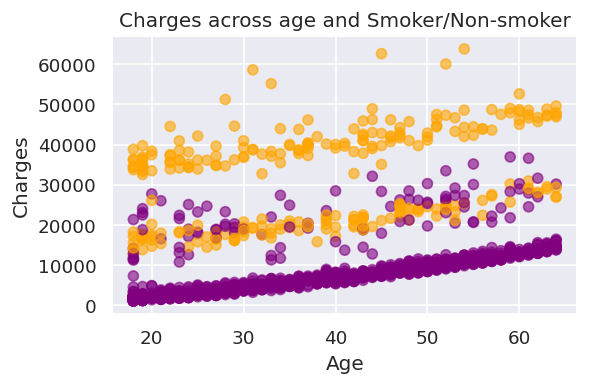

In [29]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'yes':'orange', 'no':'purple'}
plt.scatter(df_ins['age'], df_ins['charges'],alpha=0.6, c= df_ins['smoker'].apply(lambda x: colors[x]))
plt.title('Charges across age and Smoker/Non-smoker')
plt.xlabel('Age')
plt.ylabel('Charges');

Люди, которые курят, изображены оранжевым цветом, а те, кто этого не делает, изображены фиолетовым цветом на точечном графике.

Визуально видно, что курильщики тртят на медицинске услуги больше, чем некурящие в любом возрасте.

## Среднее значение трат курящих выше средних трат некурящих

Сформулируем гипотезы

Ho = "Среднее значение трат курящих на медицинские услуги некурящих одинаково"

Ha = "Среднее значение трат курящих выше средних трат некурящих"

In [30]:
# Two sample t test to check whether mean of charges in male significantly differ from mean of charges in female
Ho = "Среднее значение трат курящих на медицинские услуги некурящих одинаково"   # Stating the Null Hypothesis
Ha = "Среднее значение трат курящих на медицинские услуги некурящих различно"   # Stating the Alternate Hypothesis

x = np.array(df_ins[df_ins.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df_ins[df_ins.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array


H0 - дисперсии равны

H1 - не равны

In [31]:

import scipy.stats as stat

In [32]:
results = stat.levene(x, y)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

1.5593284881803726e-66
Отклонить гипотезу о равенстве дисперсий


In [33]:

t,p_value  = stats.ttest_ind(x,y,  equal_var=False)

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')


Среднее значение трат курящих на медицинские услуги некурящих различно так как p value - 0.0 < 0.05


Траты курящих и некурящих людей различны. Траты курящих больше.

In [34]:
Ho = "Среднее значение трат курящих на медицинские услуги некурящих одинаково"   # Stating the Null Hypothesis
Ha = "Среднее значение трат не курящих на медицинские услуги некурящих меньше, чем  у курящих"

In [ ]:

t,p_value  = stats.ttest_ind(y,x,  equal_var=False, alternative='less')

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')

Среднее значение трат не курящих на медицинские услуги некурящих меньше, чем  у курящих так как p value - 0.0 < 0.05


In [35]:
Ho = "Среднее значение трат курящих на медицинские услуги некурящих одинаково"   # Stating the Null Hypothesis
Ha = "Среднее значение трат курящих на медицинские услуги некурящих больше, чем  у не курящих"

In [36]:

t,p_value  = stats.ttest_ind(x,y,  equal_var=False, alternative='greater')

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')

Среднее значение трат курящих на медицинские услуги некурящих больше, чем  у не курящих так как p value - 0.0 < 0.05


**2. Отличается ли индекс массы тела мужчины и женщины**

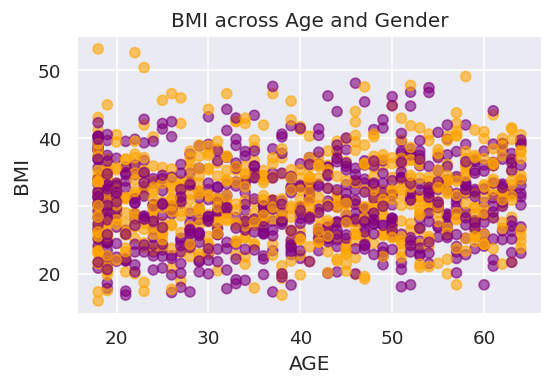

In [37]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'female':'purple', 'male':'orange'}
plt.scatter(df_ins.age, df_ins.bmi, alpha=0.6, c=df_ins.sex.apply(lambda x: colors[x]))
plt.title('BMI across Age and Gender')
plt.xlabel('AGE')
plt.ylabel('BMI');

Визуально ясно, что индекс массы тела не имеет никакого отношения к полу на протяжении веков. Подтвердим данное утверждение на основании подтверждении гипотезы.

In [38]:
Ho = "В среднем индекс массы тела мужчины и женщины одинаковый"   # Stating the Null Hypothesis
Ha = "В среднем индекс массы тела мужчины и женщины различный"
x = np.array(df_ins[df_ins.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df_ins[df_ins.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array


In [39]:
results = stat.levene(x, y)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.949963293424026
Принять гипотезу о равенстве дисперсий


In [40]:

t,p_value  = stats.ttest_ind(x,y, equal_var=True)

if p_value < 0.05:
    print(f'{Ha} так как  p_value {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p_value {p_value.round(3)} > 0.05')

В среднем индекс массы тела мужчины и женщины одинаковый так как p_value 0.09 > 0.05


*Индекс массы тела мужчины и женщины одинаковые*

**Альтернативным способом проверки зависимости ИМТ от пола является использование теста хи-квадрат**

In [41]:
eighteen = df_ins[df_ins['age'] == 18]
eighteen.sex.value_counts()
sample_18_male = eighteen[eighteen['sex'] == 'male'].bmi.iloc[:-3]   #excluding last three elements
sample_18_female = eighteen[eighteen['sex'] == 'female'].bmi

v1, v2 = np.var(sample_18_female) , np.var(sample_18_male)

n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 46.19    # critical chi_squared statistic for dof 32 and significance level 0.05 from chi square table

Ho = "В среднем индекс массы тела мужчины и женщины одинаковый"   # Stating the Null Hypothesis
Ha = "В среднем индекс массы тела мужчины и женщины различный"

chi = (dof*v1)/v2

if chi < chi_critical:
    print(f'{Ho} as chi sqaured test statistic {chi} is less than the chi squared critical value {chi_critical}, we fail to reject Ho')
else:
    print(f'{Ha} as chi sqaured test statistic {chi} is more than the chi squared critical value {chi_critical}')

В среднем индекс массы тела мужчины и женщины одинаковый as chi sqaured test statistic 24.135100065512972 is less than the chi squared critical value 46.19, we fail to reject Ho


**3. Существенно ли отличается доля курильщиков у разных полов?**

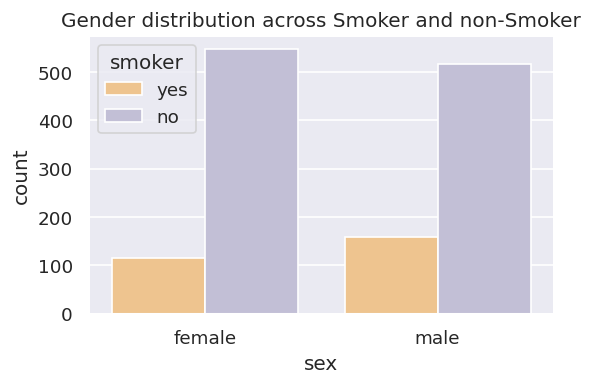

In [42]:
plt.subplots(figsize=(5,3),dpi=120)
sns.countplot(x =df_ins['sex'], hue=df_ins['smoker'], palette="PuOr")
plt.title("Gender distribution across Smoker and non-Smoker");

На приведенном выше графике можно заметить, что некурящих мужчин меньше по сравнению с некурящими женщинами, а курильщиков-мужчин больше по сравнению с курильщиками-женщинами.

Тест хи-квадрат для проверки того, значительно ли отличается доля курильщиков у разных полов

Критерий хи-квадрат используется для понимания связи между одной категориальной переменной, т.е. курильщиком/некурящим, и другой категориальной переменной, т.е. мужчиной/женщиной

Перекрестная таблица также используется и строится в виде тепловой карты перед выводом теста хи-квадрат

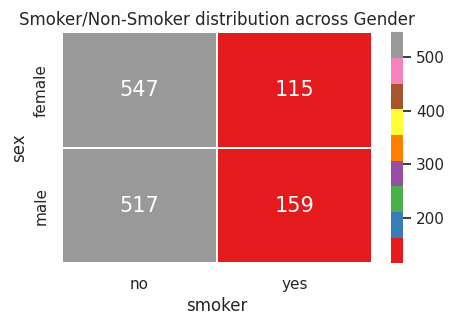

Доля курщих и некурящих различно зависимо от пола as the p_value (0.007) < 0.05


In [43]:
Ho = "Доля курщих и некурящих одинаково не зависит от пола"   # Stating the Null Hypothesis
Ha = "Доля курщих и некурящих различно зависимо от пола"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_ins.sex,df_ins.smoker)  # Contingency table of sex and smoker attributes

plt.subplots(figsize=(5,3),dpi=100)
sns.heatmap(crosstab, cmap = "Set1", annot=True,fmt = 'd',annot_kws={"size": 15},cbar=True, linewidths = .3)
plt.title("Smoker/Non-Smoker distribution across Gender");
plt.show()

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Можно сказать, что доля курильщиков существенно отличается у разных полов, т.е. мужчин и женщин, поскольку мы отвергаем нулевую гипотезу.

**4. Является ли распределение ИМТ среди женщин, не имеющих детей, одного ребенка и двух детей, одинаковым?**

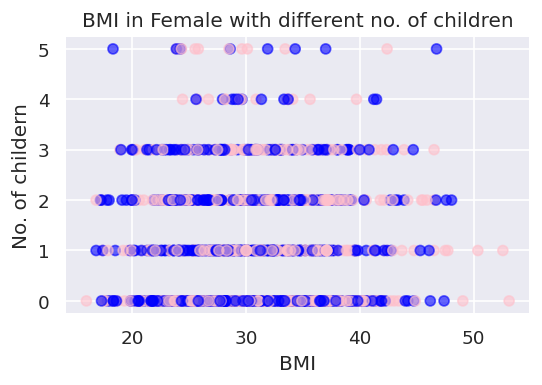

In [44]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'female':'blue', 'male':'pink'}
plt.scatter(df_ins['bmi'], df_ins['children'],alpha=0.6, c= df_ins['sex'].apply(lambda x: colors[x]))
plt.title('BMI in Female with different no. of children')

plt.xlabel('BMI')
plt.ylabel('No. of childern');

Женщины изображены в синем цвете, а мужчины изображены в розовом цвете

Похоже, что распределение ИМТ у женщин с 0,1,2,3,4 или 5 детьми одинаково.

**Perform One-way ANOVA to test if the Distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same**

In [45]:
female_df = copy.deepcopy(df_ins[df_ins['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

Ho = "Распределение индекса массы тела женщин с детьмии без детей одинаково"   # Stating the Null Hypothesis
Ha = "Распределение индекса массы тела женщин с детьмии различно"   # Stating the Alternate Hypothesis


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} так как p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} так как p_value ({p_value.round(3)}) > 0.05')

Распределение индекса массы тела женщин с детьмии без детей одинаково так как p_value (0.716) > 0.05


Мы можем сказать, что ИМТ одинаков у женщин с разным количеством детей, поскольку мы не можем отвергнуть нулевую гипотезу.


СВОДКА

Система данных страхования имеет 7 столбцов, а именно возраст, ИМТ, сборы, дети, пол, курильщик и регион с 1338 записями

ИМТ, кажется, имеет колоколообразную кривую, но его правый хвост немного растянулся, что указывает на существование экстремальных значений. Становится очевидным, что у него есть выбросы в квадратном графике.

Возраст равномерно распределен

Страховые сборы положительно искажены, поскольку они имеют много экстремальных значений

75% людей имеют 2 или менее детей

Число курящих женщин меньше, чем число курильщиков мужского пола. Число некурящих женщин больше, чем число некурящих мужчин

Юго-восточный регион имеет самое высокое население, а северо-восток имеет наименьшее. Юго-запад имеет больше населения, чем северо-запад.

Сборы курильщиков и некурящих статистически различаются

ИМТ статистически одинаков для разных полов

Привычки курения значительно различаются для разных полов

Распределение ИМТ у женщин с 0,1,2,3,4 или 5 детьми одинаково